## 보스턴 주택 가격 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston=load_boston()


In [2]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
boston_df['Price']=boston.target
print('Boston 데이터 세트 크기:',boston_df.shape)
boston_df.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


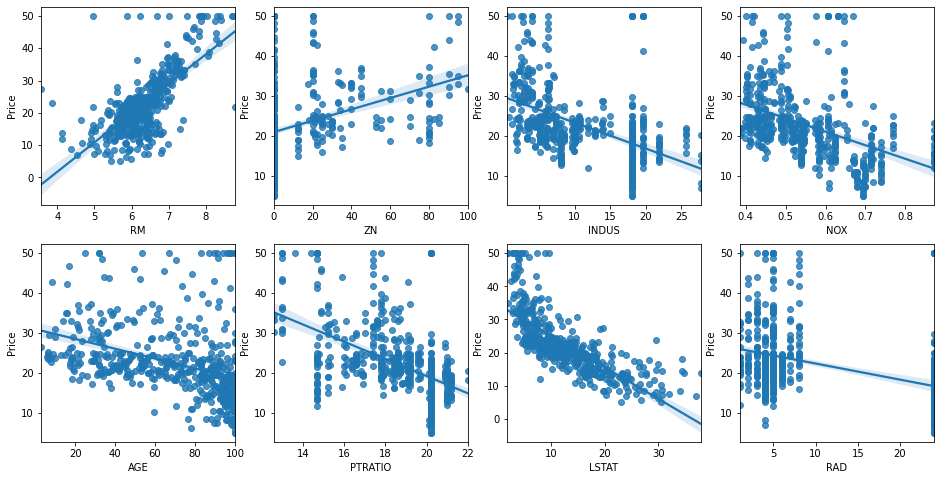

In [20]:
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature,y='Price',data=boston_df,ax=axs[row][col])
    

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=boston_df['Price']
x_data=boston_df.iloc[:,:-1]


In [28]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y_target,test_size=0.3,random_state=156)

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE:4.159
Variance score: 0.757


In [31]:
print('절편 값:',lr.intercept_)
print('회귀계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [40]:
coeff=pd.Series(np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [44]:
from sklearn.model_selection import cross_val_score

neg_val_score=cross_val_score(lr,x_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_val_score)
avg_rmse=np.mean(rmse_scores)

print('5 folds 의 개별 negative mse scores',np.round(neg_val_score,2))
print('5 folds 의 개별 rmse scores:',np.round(rmse_scores,2))
print('5 folds 의 평균 rmse: {0:3f}'.format(avg_rmse))

5 folds 의 개별 negative mse scores [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 rmse scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 rmse: 5.828659
